# Chapter 9 Exercises

1. _How would you define clustering? Can you name a few clustering algorithms?_<br>
<br>
Clustering is a technique for grouping instances in a dataset.<br>
Some example algorithms are K-Means, DBSCAN, and agglomerative clustering<br>
<br>
1. _What are some of the main applications of clustering algorithms?_<br>
<br>
To explore patterns in the dataset, find relationships, specifically:anomaly detection, dimensionality reduction or feature engineering (with affinity vectors), semi-suspervised learning.<br><br>
1. _Describe two techniques to select the right number of clusters when using K-Means._<br>
<br>
You can look for the elbow in the inertia vs. cluster graph, which will give a rough idea. A better technique is to try and maximize the silhouette score. The best technique is to analyze silhouette diagrams and choose the cluster number that gives even clusters compared with the silhouette score.
<br><br>
1. _What is label propagation? Why would you implement it, and how?_<br>
<br>
A technique for generating labels when your coverage of the dataset is sparse, and you'd like to perform supervised learning, for example.<br><br>
1. _Can you name two clustering algorithms that can scale to large datasets? And two that look for regions of high density?_<br>
<br>
large datasets: BIRCH, agglomerative clustering <br>
high density: DBSCAN, Mean-Shift<br><br>
1. _Can you think of a use case where active learning would be useful? How would you implement it?_<br>
<br>
Identification of objects in images from self-driving car cameras.<br>
Force the public to label the images to prove that they are humans on websites.
<br><br>
1. _What is the difference between anomaly detection and novelty detection?_<br>
<br>
Novelty detection assumes no outliers in the training set, while anomaly detection does not.
<br><br>
1. _What is a Gaussian mixture? What tasks can you use it for?_<br>
<br>
A probabalistic model that assumes instances were generated from several Gaussian distributions<br>
Anomaly detection, generating new instances.
<br><br>
1. _Can you name two techniques to find the right number of clusters when using a Gaussian mixture model?_<br>
<br>
Find the number of clusters that minimizes the Bayesian information criterion (BIC) or the Akaike information criterion.<br>
Alternatively, fit a BayesianGaussianMixture with the n_components set to slightly more clusters than you believe exist, and it will eliminate the unnecessary ones.
<br><br>
1. _The classic Olivetti faces dataset contains 400 grayscale 64 × 64–pixel images of faces. Each image is flattened to a 1D vector of size 4,096. 40 different people were photographed (10 times each), and the usual task is to train a model that can predict which person is represented in each picture. Load the dataset using the sklearn.datasets.fetch_olivetti_faces() function, then split it into a training set, a validation set, and a test set (note that the dataset is already scaled between 0 and 1). Since the dataset is quite small, you probably want to use stratified sampling to ensure that there are the same number of images per person in each set. Next, cluster the images using K-Means, and ensure that you have a good number of clusters (using one of the techniques discussed in this chapter). Visualize the clusters: do you see similar faces in each cluster?_

In [3]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import StratifiedShuffleSplit

data_bunch = fetch_olivetti_faces()
X = data_bunch['data']
y = data_bunch['target']
images = data_bunch['images']

sss = StratifiedShuffleSplit(n_splits=1, random_state=0, test_size=.15)
for train_index, test_index in sss.split(X, y):
    X_train_val, X_test = X[train_index], X[test_index]
    y_train_val, y_test = y[train_index], y[test_index]
    images_train_val, images_test = images[train_index], images[test_index]
    
for train_index, test_index in sss.split(X_train_val, y_train_val):
    X_train, X_val = X_train_val[train_index], X_train_val[test_index]
    y_train, y_val = y_train_val[train_index], y_train_val[test_index]
    images_train, images_val = images[train_index], images[test_index]    

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = []
sscores = []
inertias = []
group_range = range(2, 41)
for i in group_range:
    km = KMeans(n_clusters=i, random_state=0).fit(X_train)
    kmeans.append(km)
    s = silhouette_score(X_train, km.labels_)
    sscores.append(s)
    inertias.append(km.inertia_)
    print(str(i) + '\t' + str(s) + '\t' + str(km.inertia_))

2	0.15360004	19065.12890625
3	0.12463136	17163.208984375
4	0.10718503	16093.8662109375
5	0.10523325	15542.6787109375
6	0.10339936	15053.92578125
7	0.09591838	14680.662109375
8	0.09423605	14245.017578125
9	0.091334574	14036.01171875
10	0.08935752	13613.1328125
11	0.09471936	13209.3359375
12	0.09261057	12939.67578125
13	0.079387	12834.0390625
14	0.09268189	12595.9169921875
15	0.10027179	12330.2470703125
16	0.09038564	12008.416015625
17	0.0999498	11960.021484375
18	0.10278405	11590.244140625
19	0.10671491	11517.83984375
20	0.10377191	11243.8974609375
21	0.104994185	11050.6357421875
22	0.11610808	10782.7080078125
23	0.12157353	10568.07421875
24	0.11310863	10484.1611328125
25	0.10756607	10456.353515625
26	0.12032012	10209.716796875
27	0.11884317	10065.693359375
28	0.13221188	9742.08203125
29	0.13105357	9664.0390625
30	0.13115476	9576.9521484375
31	0.1340997	9406.955078125
32	0.13530229	9308.7265625
33	0.13697809	9165.1396484375
34	0.13908912	8946.91796875
35	0.13951124	8873.521484375
36	0.1

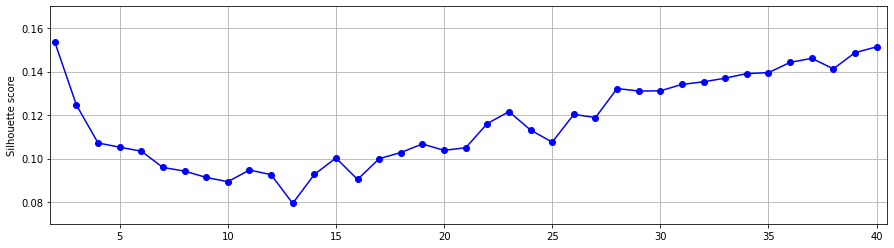

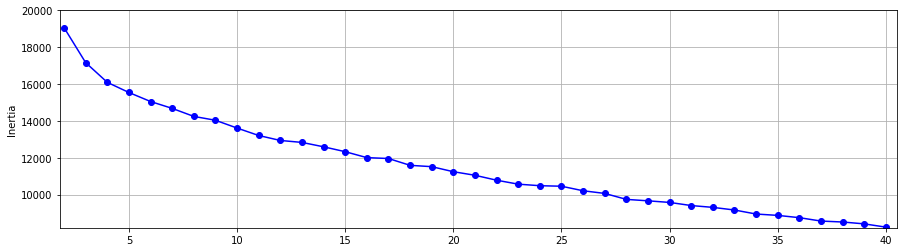

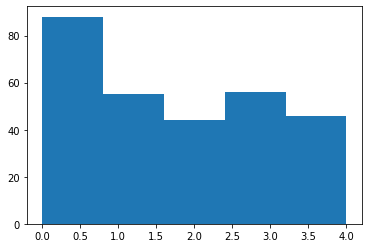

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 4))
plt.plot(range(2, 41), sscores, "bo-")
plt.ylabel("Silhouette score")
plt.axis([1.8, 40.5, 0.07, 0.17])
plt.grid()
plt.show()

group_range = range(2, 41)
plt.figure(figsize=(15, 4))
plt.plot(group_range, inertias, "bo-")
plt.ylabel("Inertia")
plt.axis([1.8, 40.5, 8200, 20000])
plt.grid()
plt.show()

km = kmeans[5-2]
n_groups = km.cluster_centers_.shape[0]

plt.hist(km.labels_, bins=n_groups)
plt.show()

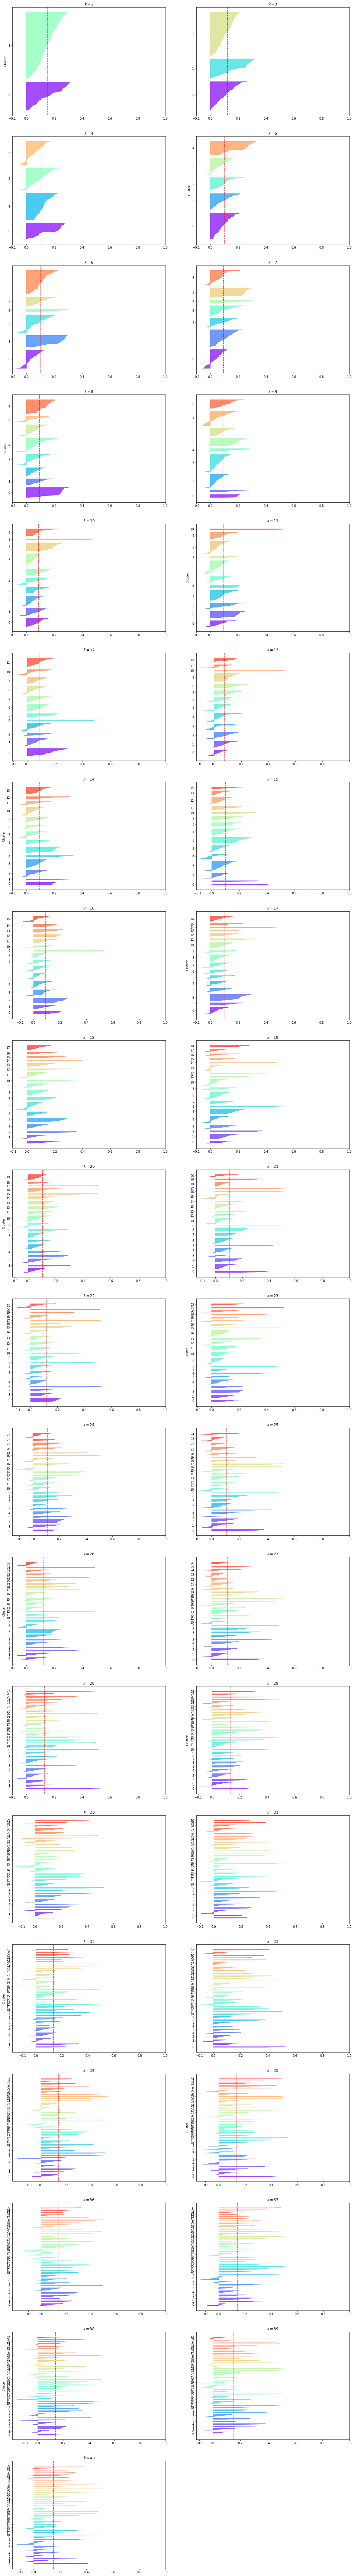

In [74]:
import numpy as np
import math
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

def plot_silhouette_diagrams(group_range, X, kmeans_per_k, silhouette_scores):
    '''
     adapted from https://github.com/ageron/handson-ml3/blob/main/09_unsupervised_learning.ipynb
    '''

    plt.figure(figsize=(20, 8 * len(group_range)/2))
    for j, k in enumerate(group_range):
        #if (j % 3) == 0:
        #plt.subplot(1, 3, (j % 3)+1)
        plt.subplot(math.ceil(len(group_range)/2), 2, j +1)

        y_pred = kmeans_per_k[j].labels_
        silhouette_coefficients = silhouette_samples(X, y_pred)

        padding = len(X) // 30
        pos = padding
        ticks = []
        for i in range(k):
            coeffs = silhouette_coefficients[y_pred == i]
            coeffs.sort()

            color = plt.cm.rainbow(i / k)
            plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                              facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append(pos + len(coeffs) // 2)
            pos += len(coeffs) + padding

        plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
        plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
        if j % 3 == 0:
            plt.ylabel("Cluster")

  #      if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        #plt.xlabel("Silhouette Coefficient")
#        else:
 #           plt.tick_params(labelbottom=False)

        plt.axvline(x=silhouette_scores[j], color="red", linestyle="--")
        plt.title(f"$k={k}$")

   # save_fig("silhouette_analysis_plot")
    #plt.subplots_adjust(wspace=0, hspace=0)
    #    if (j % 3) == 0:
    plt.show()
    
plot_silhouette_diagrams(group_range, X_train, kmeans, sscores)

0


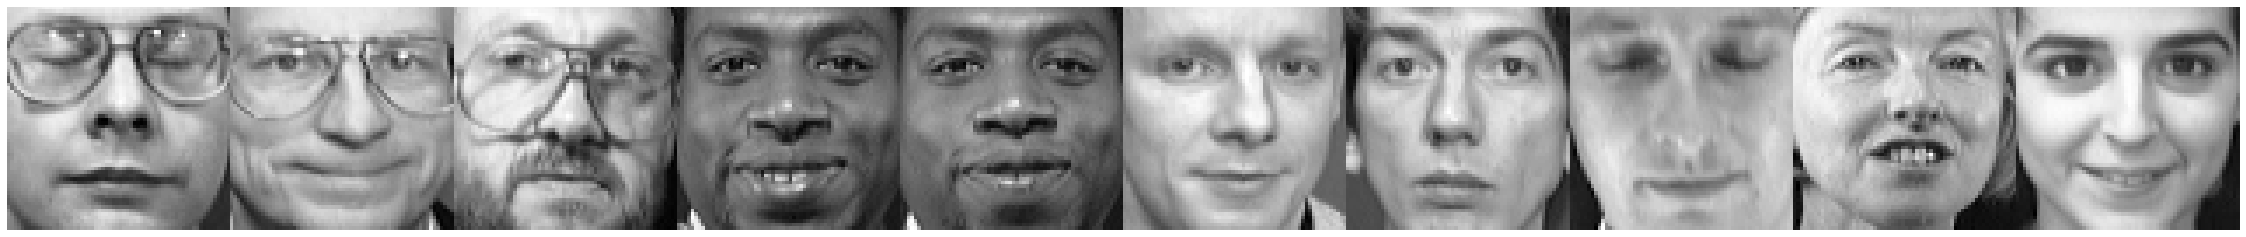

1


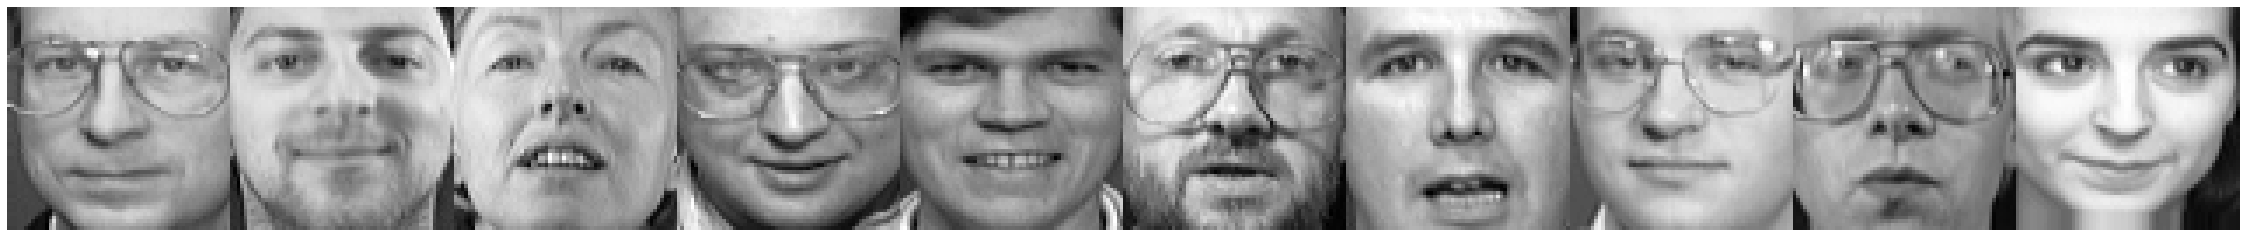

2


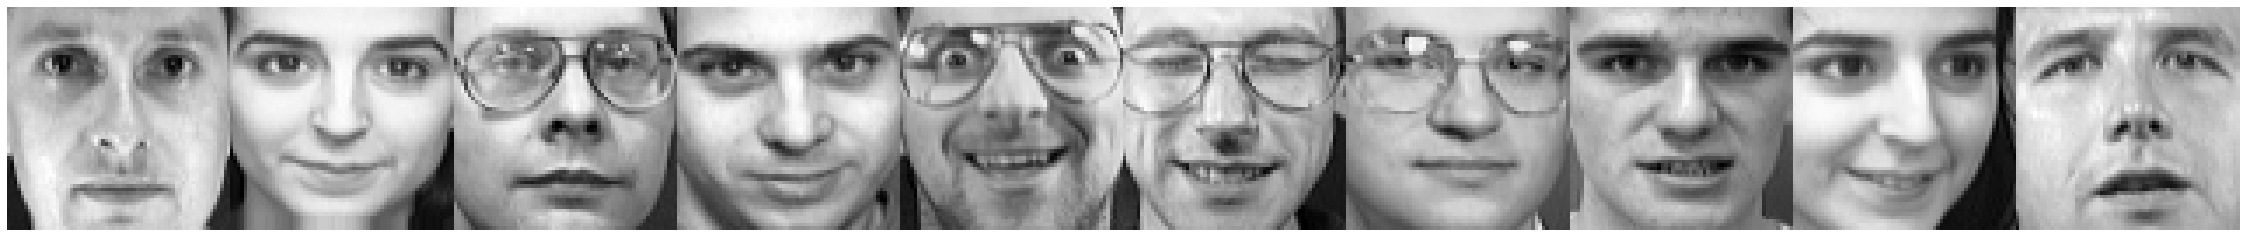

3


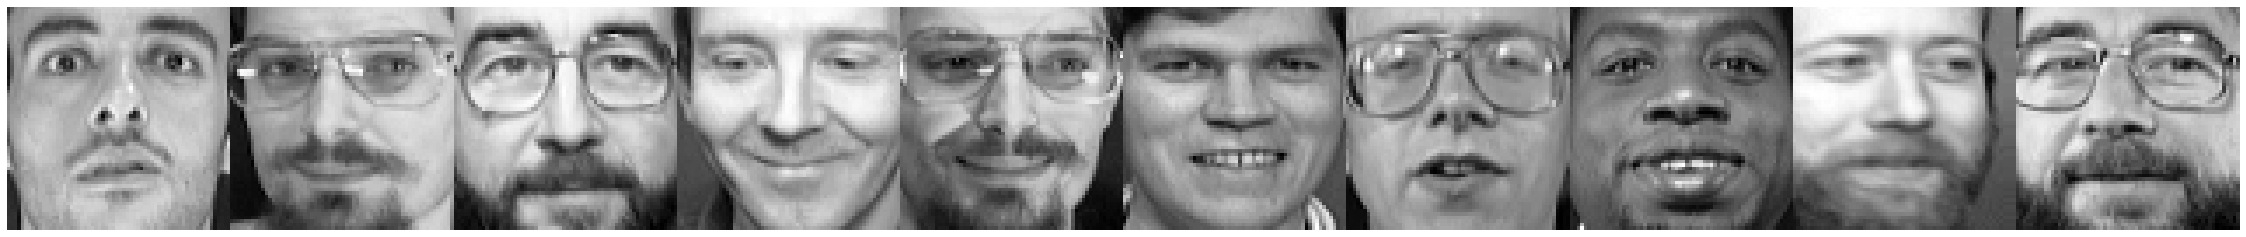

4


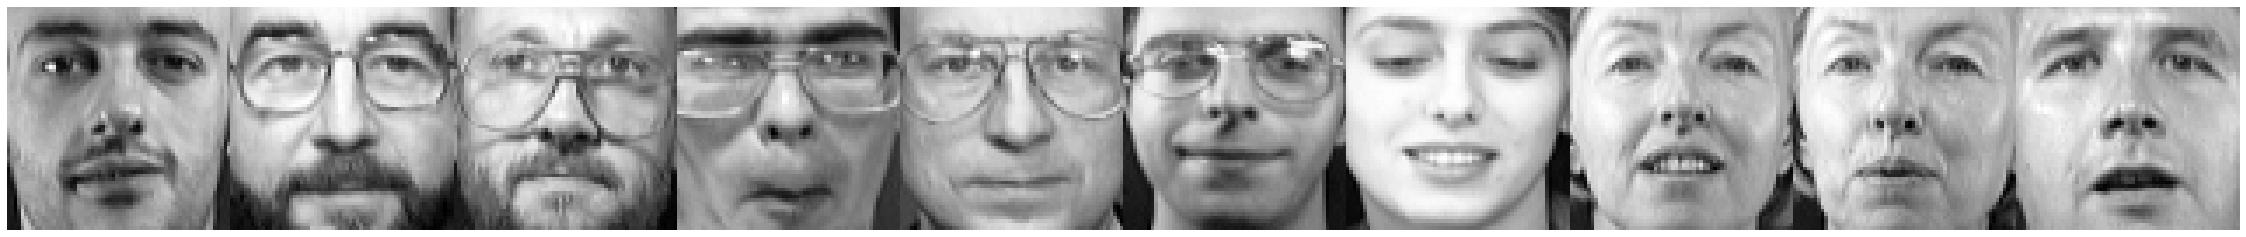

In [76]:
for i in range(0, n_groups):
    plt.figure(figsize=(40, 40))
    print(i)
    subplot_idx = 1
    for j, g in enumerate(km.labels_):
        if g == i:
            plt.subplot(1, 10, subplot_idx)
            plt.imshow(images_train[j], cmap="gray")
            plt.axis("off")
            subplot_idx += 1
            if subplot_idx > 10:
                break
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

11. _Continuing with the Olivetti faces dataset, train a classifier to predict which person is represented in each picture, and evaluate it on the validation set. Next, use K-Means as a dimensionality reduction tool, and train a classifier on the reduced set. Search for the number of clusters that allows the classifier to get the best performance: what performance can you reach? What if you append the features from the reduced set to the original features (again, searching for the best number of clusters)?_

12. _Train a Gaussian mixture model on the Olivetti faces dataset. To speed up the algorithm, you should probably reduce the dataset’s dimensionality (e.g., use PCA, preserving 99% of the variance). Use the model to generate some new faces (using the sample() method), and visualize them (if you used PCA, you will need to use its inverse_transform() method). Try to modify some images (e.g., rotate, flip, darken) and see if the model can detect the anomalies (i.e., compare the output of the score_samples() method for normal images and for anomalies)._

13. _Some dimensionality reduction techniques can also be used for anomaly detection. For example, take the Olivetti faces dataset and reduce it with PCA, preserving 99% of the variance. Then compute the reconstruction error for each image. Next, take some of the modified images you built in the previous exercise, and look at their reconstruction error: notice how much larger the reconstruction error is. If you plot a reconstructed image, you will see why: it tries to reconstruct a normal face._